# Part 1, exploratory data analysis (EDA)

Вопросы:

1. [1 балл] Загрузка данных и предобработка - загрузите датасет, посмотрите на его `head` и `tail` и воспользуйтесь функцией `describe()` для отображения базовых статистик переменных. Для удобства отображения можно транспонировать получившийся датафрейм при помощи `.T()`
2. [1 балл] Сколько раз матч заканчивался вничью? 
3. [2 балла] Давайте посчитаем средние по всем столбцам в зависимости от результата матча. Для этого воспользуйтесь функцией `groupby`. Снова для удобства отображения можно использовать `.T()`.
4. [1 балл] Какие три команды чаще всего выступали в качестве Home Team? Это можно выяснить при помощи `.value_counts()`, примененной к нужному столбцу. 
5. [1 балл] Визуализация - Постройте гистограммы всех числовых переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 20).
6. [2 балла] Визуализация - При помощи `heatmap` постройте тепловую карту корреляций для всего датасета. Сильно ли скоррелированы переменные, отвечающие за историческое положение домашней команды в лидерборде (начинающиеся на ph_ladder) друг с другом? Гостевой команды (pa_ladder)? Как можно объяснить такую корреляцию
?
7. [2 балла] Вопрос-сюрприз! Попробуйте самостоятельно придумать какой-нибудь осмысленный вопрос для вашего датасета и ответьте на  него. Инициатива не наказуема ;)

### Комментарий к решению
С загрузкой справились :3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
soccer = pd.read_excel('Soccer_Data.xlsx')

In [19]:
soccer.head()

,league,teams_no,date,home_team,away_team,home_odd,draw_odd,away_odd,h_played,a_played,...,a_final,h_half,a_half,BTS,H1H,A1H,H2H,A2H,Unnamed: 79,Unnamed: 80
0,France-Ligue 2,20,2016-01-08,Ajaccio,Le Havre,2.63,2.97,3.24,19,19,...,1.0,NaN,NaN,1,0.0,0.0,0.0,0.0,NaN,NaN
1,France-Ligue 2,20,2016-01-08,Auxerre,Valenciennes,1.98,3.25,4.69,19,19,...,1.0,NaN,NaN,1,0.0,0.0,0.0,0.0,NaN,NaN
2,France-Ligue 2,20,2016-01-08,Bourg Peronnas,Creteil,2.00,3.52,4.14,19,19,...,1.0,NaN,NaN,1,0.0,0.0,1.0,0.0,NaN,NaN
3,France-Ligue 2,20,2016-01-08,Chamois,Dijon,2.82,3.06,2.91,19,19,...,2.0,NaN,NaN,1,0.0,0.0,0.0,0.0,NaN,NaN
4,France-Ligue 2,20,2016-01-08,Clermont,Evian,2.10,3.21,4.20,19,19,...,1.0,NaN,NaN,1,0.0,0.0,1.0,0.0,NaN,NaN


In [5]:
soccer.tail()

,league,teams_no,date,home_team,away_team,home_odd,draw_odd,away_odd,h_played,a_played,...,a_final,h_half,a_half,BTS,H1H,A1H,H2H,A2H,Unnamed: 79,Unnamed: 80
24825,Portugal-Primeira Liga,18,2017-10-30,Portimonense,V. Setubal,2.26,3.25,3.640,9,9,...,2.0,3.0,1.0,1,1.0,1.0,1.0,1.0,NaN,NaN
24826,Romania-Divizia 1,14,2017-10-30,Sfantu Gheorghe,Botosani,3.67,3.27,2.210,15,15,...,2.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
24827,Italy-Serie B,22,2017-10-30,Ternana,Carpi,2.48,3.27,3.170,11,11,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN
24828,Russia-Premier League,16,2017-10-30,UFA,Rubin Kazan,3.33,2.75,2.770,14,14,...,1.0,1.0,1.0,1,1.0,1.0,1.0,0.0,NaN,NaN
24829,Italy-Serie A,20,2017-10-30,Verona,Inter,8.14,5.28,1.413,10,10,...,2.0,0.0,1.0,1,0.0,1.0,1.0,1.0,NaN,NaN


In [6]:
soccer.describe()

,teams_no,home_odd,draw_odd,away_odd,h_played,a_played,ph_ladder5,ph_ladder4,ph_ladder3,ph_ladder2,...,a_goal_signal,Ladder_signal,a_final,h_half,a_half,BTS,H1H,A1H,H2H,A2H
count,24830.000000,24830.000000,24830.000000,24830.000000,24830.000000,24830.000000,24830.000000,24830.000000,24830.000000,24830.000000,...,23834.000000,24830.000000,24820.000000,15729.000000,15729.000000,24830.000000,17365.000000,17365.000000,17365.000000,17365.000000
mean,18.399195,1.874239,2.753825,3.093021,19.237294,19.241764,8.497181,8.800403,9.010632,9.318929,...,0.336433,-0.183609,1.222280,0.564181,0.414394,0.549537,0.355888,0.276476,0.546041,0.499280
std,4.174364,1.734159,1.847875,3.127766,11.773077,11.784165,6.314190,6.216387,6.125440,6.009516,...,0.864980,7.398644,1.133583,0.789018,0.676830,0.497550,0.478795,0.447268,0.497890,0.500014
min,10.000000,-1.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,9.000000,9.000000,3.000000,4.000000,4.000000,4.000000,...,-0.125000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,1.910000,3.320000,2.880000,20.000000,20.000000,8.000000,8.000000,8.000000,9.000000,...,0.363636,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,22.000000,2.500000,3.610000,4.090000,28.000000,28.000000,13.000000,13.000000,14.000000,14.000000,...,0.857143,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,30.000000,28.010000,26.000000,48.810000,73.000000,73.000000,30.000000,30.000000,30.000000,30.000000,...,10.000000,28.000000,9.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Комментарий к решению
Красиво решили, круто!

In [29]:
print ('There were', soccer.RESULT.value_counts().DRAW, 'draws')

There were 6880 draws


In [33]:
soccer.T

,0,1,2,3,4,5,6,7,8,9,...,24820,24821,24822,24823,24824,24825,24826,24827,24828,24829
league,France-Ligue 2,France-Ligue 2,France-Ligue 2,France-Ligue 2,France-Ligue 2,France-Ligue 2,France-Ligue 2,France-Ligue 2,France-Ligue 1,Spain-Segunda Division,...,Bulgaria-Premier League,Sweden-Superettan,Sweden-Allsvenskan,Sweden-Superettan,Brazil-Brasilero Serie A,Portugal-Primeira Liga,Romania-Divizia 1,Italy-Serie B,Russia-Premier League,Italy-Serie A
teams_no,20,20,20,20,20,20,20,20,20,22,...,14,16,16,16,20,18,14,22,16,20
date,2016-01-08 00:00:00,2016-01-08 00:00:00,2016-01-08 00:00:00,2016-01-08 00:00:00,2016-01-08 00:00:00,2016-01-08 00:00:00,2016-01-08 00:00:00,2016-01-08 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,...,2017-10-30 00:00:00,2017-10-30 00:00:00,2017-10-30 00:00:00,2017-10-30 00:00:00,2017-10-30 00:00:00,2017-10-30 00:00:00,2017-10-30 00:00:00,2017-10-30 00:00:00,2017-10-30 00:00:00,2017-10-30 00:00:00
home_team,Ajaccio,Auxerre,Bourg Peronnas,Chamois,Clermont,Nancy,Nimes,Paris FC,Paris St.-Germain,Alcorcon,...,Lok Plovdiv,Norrby,Norrkoping,Osters IF,Palmeiras,Portimonense,Sfantu Gheorghe,Ternana,UFA,Verona
away_team,Le Havre,Valenciennes,Creteil,Dijon,Evian,Laval,Brest,Tours,SC Bastia,Girona,...,Etar 1924,Varnamo,Orebro,Brommapojkarna,Cruzeiro MG,V. Setubal,Botosani,Carpi,Rubin Kazan,Inter
home_odd,2.63,1.98,2,2.82,2.1,1.448,2.43,3.02,1.096,2.09,...,1.83,1.925,1.671,3.28,1.819,2.26,3.67,2.48,3.33,8.14
draw_odd,2.97,3.25,3.52,3.06,3.21,4.28,3.21,2.93,11.9,3.27,...,3.5,4.09,4.54,3.78,3.58,3.25,3.27,3.27,2.75,5.28
away_odd,3.24,4.69,4.14,2.91,4.2,9.93,3.3,2.83,34.38,4.1,...,3.5,3.83,4.86,2.2,5.08,3.64,2.21,3.17,2.77,1.413
h_played,19,19,19,19,19,19,19,19,19,19,...,13,28,28,28,30,9,15,11,14,10
a_played,19,19,19,19,19,19,19,19,19,19,...,13,28,28,28,30,9,15,11,14,10


### Комментарий к решению
Отлично

In [37]:
soccer.groupby('RESULT').mean()

,teams_no,home_odd,draw_odd,away_odd,h_played,a_played,ph_ladder5,ph_ladder4,ph_ladder3,ph_ladder2,...,a_goal_signal,Ladder_signal,a_final,h_half,a_half,BTS,H1H,A1H,H2H,A2H
RESULT,,,,,,,,,,,,,,,,,,,,,
AWAY,18.258638,2.233980,2.582919,2.314024,18.775786,18.750129,9.158200,9.521919,9.772563,10.138602,...,0.176365,-1.973827,2.291774,0.307287,0.734818,0.506704,0.213212,0.455372,0.254593,0.851364
DRAW,18.431395,1.794828,2.599544,2.829570,18.512500,18.522384,8.535610,8.847384,9.095349,9.380378,...,0.339379,-0.431686,0.956977,0.377803,0.338035,0.703052,0.278404,0.246867,0.412698,0.444862
HOME,18.484403,1.654129,2.987983,3.863517,20.077595,20.101334,7.968315,8.219737,8.373749,8.653816,...,0.455814,1.345890,0.586999,0.885210,0.220606,0.478517,0.514469,0.162076,0.853367,0.271564


### Комментарий к решению
И тут тоже верно

In [36]:
soccer.home_team.value_counts().head(3)

Red Star         45
Coventry City    45
Oxford Utd       43
Name: home_team, dtype: int64

### Комментарий к решению
Всё хорошо, с распределениями, кстати, нам повезло, все пременные более-менее интересные, не константные и со значительным разбросом вокруг среднего, моделькам будет из чего тягать информацию

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


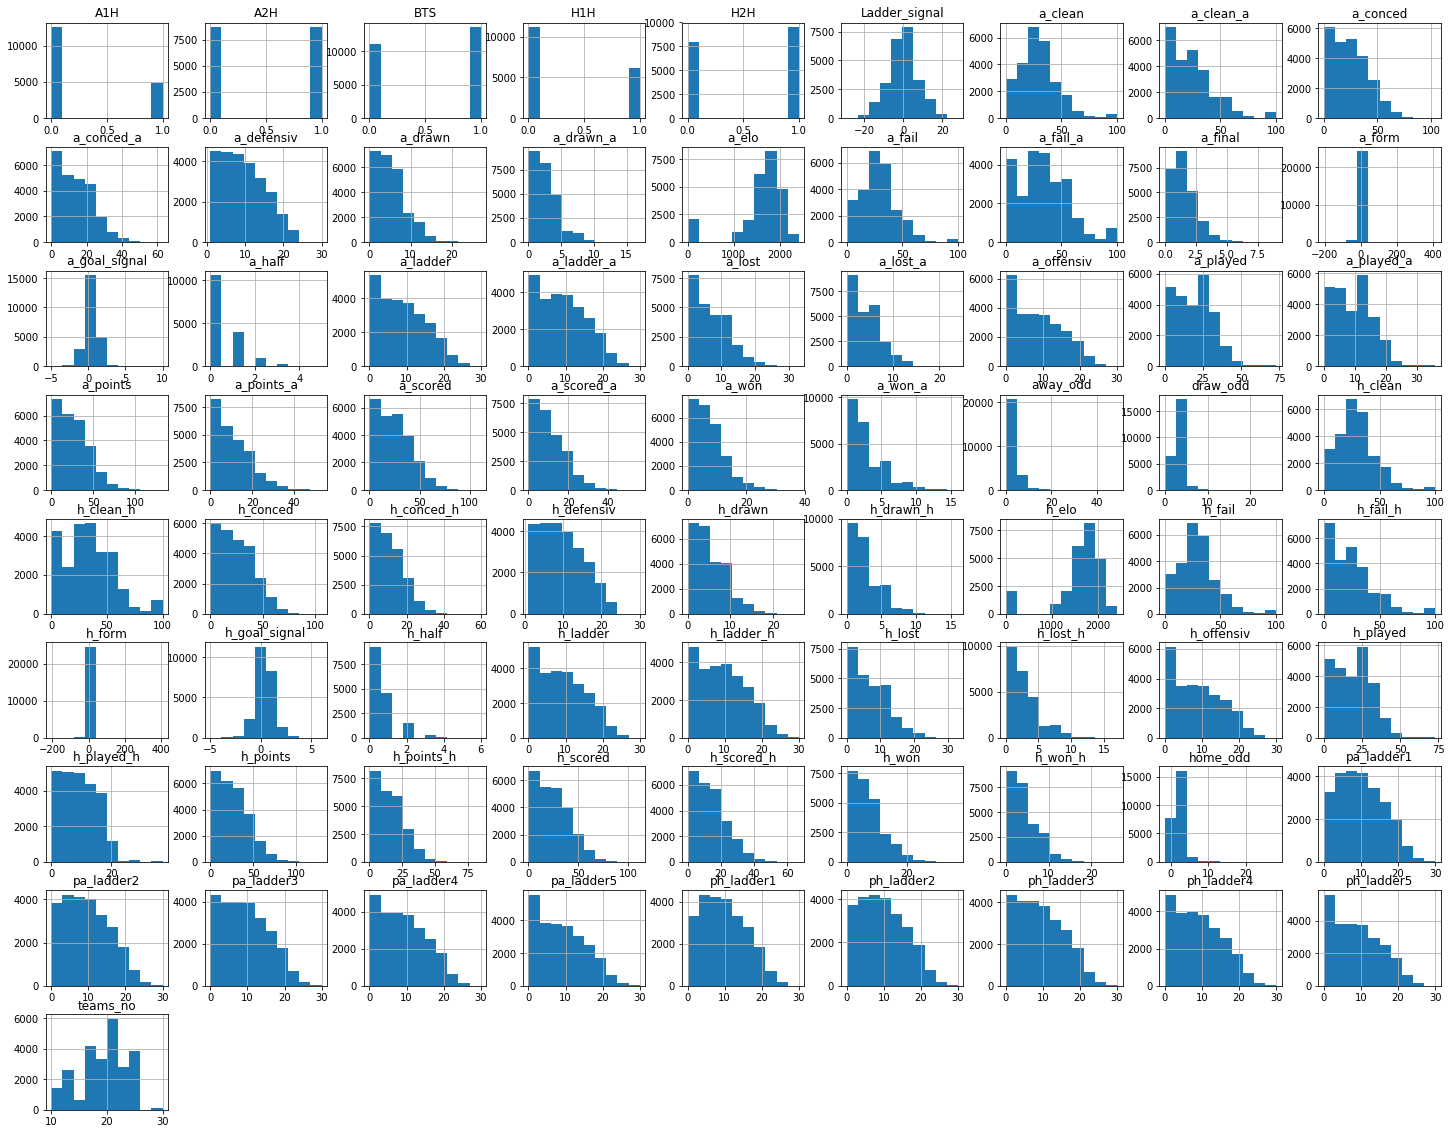

In [40]:
fig = plt.figure(figsize = (25,20)) 
ax = fig.gca() 
soccer.hist(ax = ax);

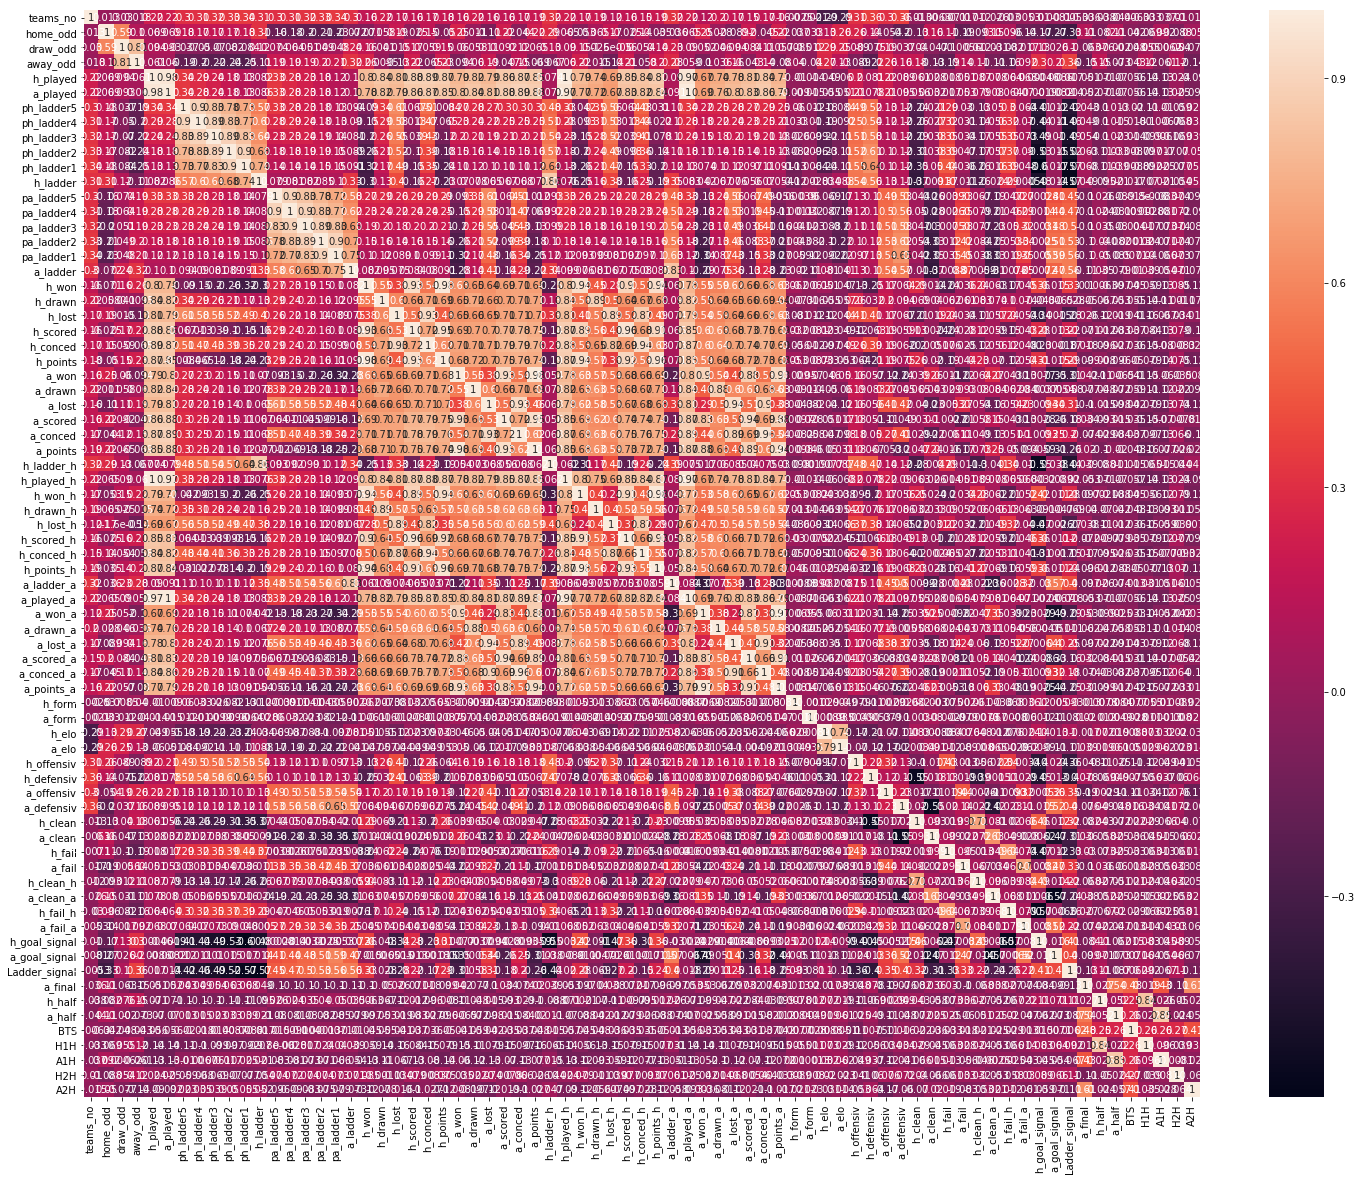

In [41]:
plt.figure(figsize=(25,20))
sns.heatmap(soccer.corr(), annot=True)

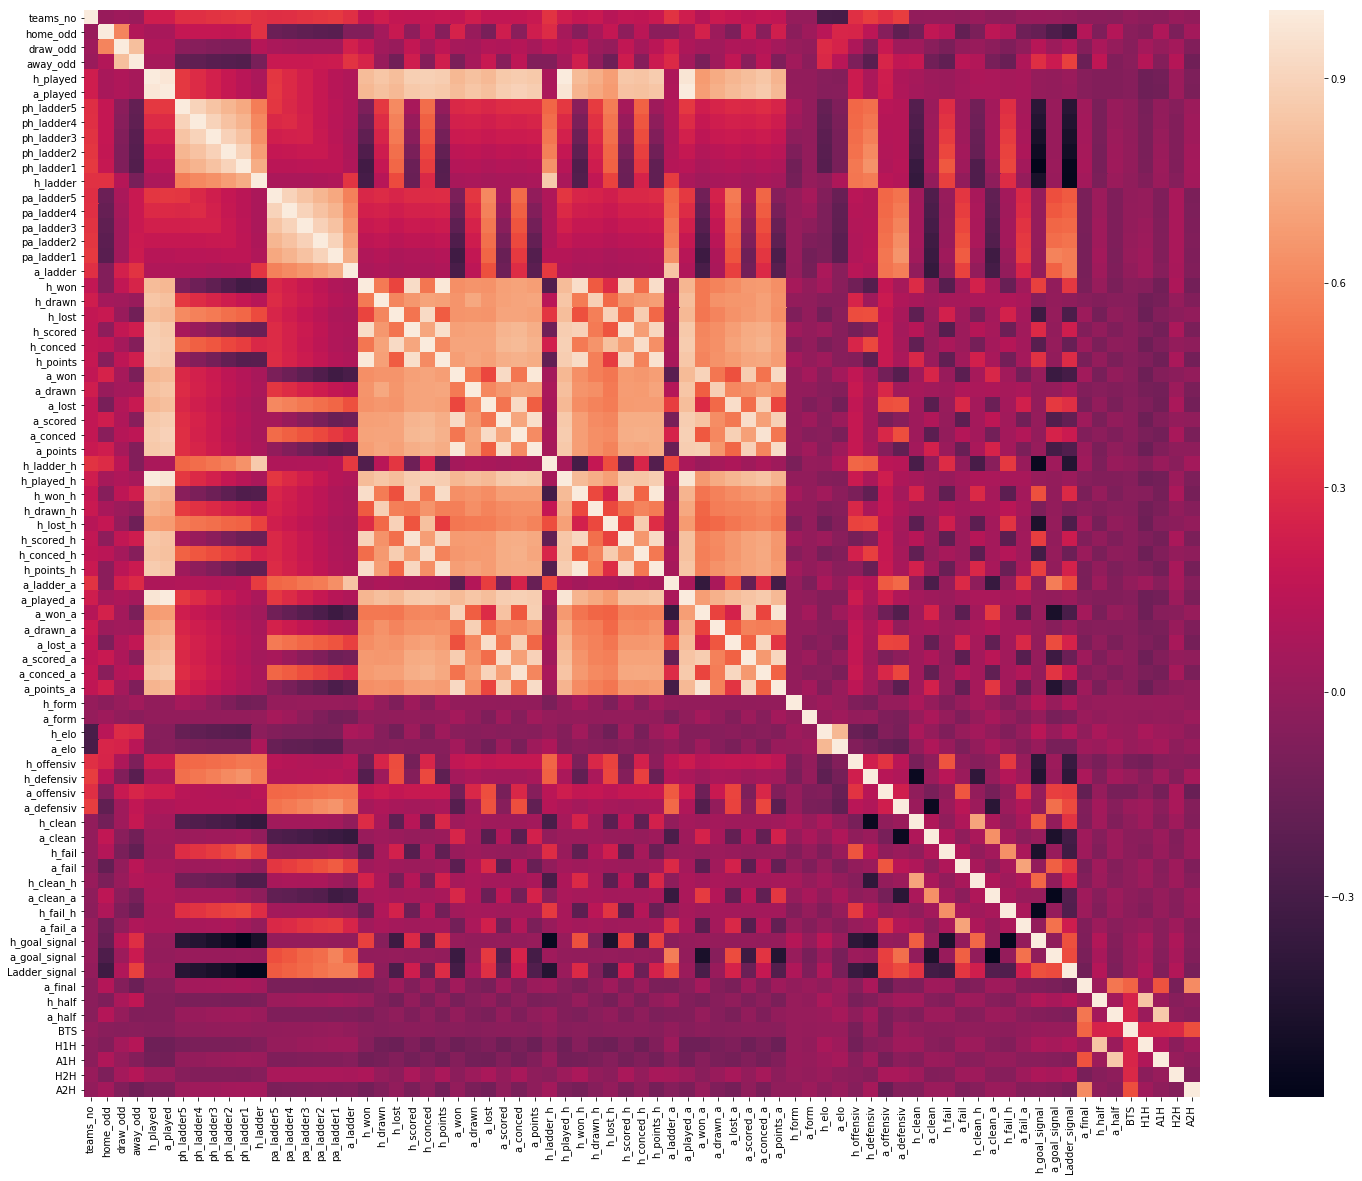

In [43]:
plt.figure(figsize=(25,20))
sns.heatmap(soccer.corr())

### Комментарий к решению
Отличное объяснение :)

In [44]:
#корреляция между переменных положения команды в лидерборде достаточно высокая и для гостевой и для домашней команд. 
#это связаано с тем, что вышеупомянутые переменные не могут отличатся друг от друга слишком сильным образом.  
#не одна команда не в силах кардинально менять свое положение в турнирной таблице при помощи одной победы или одного поражения.

### Комментарий к решению
Неплохо, шансы подзаработать не то чтобы большие, но есть ;) 

In [67]:
#Вопрос, придуманный мною)))) 

#Везунчик-ставкозависимый Ованнес утверждает, что он поставил абсолютно на все матчи датасета и все его ставки прошли. 
#Найти самый высокий коэффициент, который прошел у счастливого и богатого мальчика.

a = soccer.groupby('RESULT').home_odd.max().HOME
b = soccer.groupby('RESULT').draw_odd.max().DRAW
c = soccer.groupby('RESULT').away_odd.max().AWAY

if a>b:
    if b>=c:
        print (a)
    elif c>=a:
        print (c)
else:
    if b>=c:
        print (b)
    else:
        print (c)
        

33.0


In [4]:
#post scriptum

#a = моя оценка

a = int(input ())

if a == 10:
    print ('Дмитрий, вы самый лучший препод in the whole Universe')
else: 
    print ('Все равно спасибо (((')

10
Дмитрий, вы самый лучший препод in the whole Universe


![](https://sayingimages.com/wp-content/uploads/get-a-gold-star-good-job-meme.jpg)